In [81]:
import glob
import xarray as xr
import pyaerocom as pya
pya.change_verbosity('critical', pya.logger)
pya.change_verbosity('critical', pya.print_log)
from iris import load_cube

import iris
import os

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from pyaerocom import Region, Filter

# What you can do ising the region object currently.

## Raises not implemented error if you try to get closest region and send a htap region as input. Maybee we should have a mapping between square to htap here..?

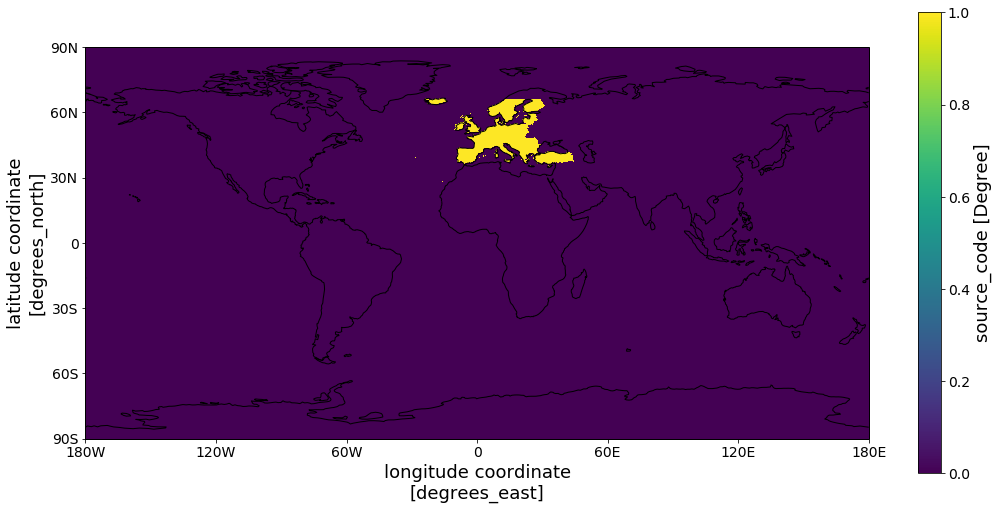

In [126]:
r = Region('EUR')
ax = r.plot()

# Need this for masks as well? suggestion. pya.region.masks()

In [4]:
pya.region.all()

['EUROPE',
 'WORLD',
 'ASIA',
 'AUSTRALIA',
 'CHINA',
 'INDIA',
 'NAFRICA',
 'SAFRICA',
 'SAMERICA',
 'NAMERICA',
 'PAN',
 'EAS',
 'NAF',
 'MDE',
 'LAND',
 'SAS',
 'SPO',
 'OCN',
 'SEA',
 'RBU',
 'EEUROPE',
 'NAM',
 'WEUROPE',
 'SAF',
 'USA',
 'SAM',
 'EUR',
 'NPO',
 'MCA']

In [7]:
f = Filter("EUROPE-noMOUNTAINS-LAND")

In [8]:
f._name

'EUROPE-noMOUNTAINS-LAND'

# Example Ungridded, Gridded and Colocated.

In [12]:
import pyaerocom as pya

In [14]:
pya.browse_database('*MODIS6*aqua*')


Pyaerocom ReadGridded
---------------------
Data ID: MODIS6.1aqua
Data directory: /lustre/storeA/project/aerocom/aerocom-users-database/SATELLITE-DATA/MODIS6.1aqua/renamed
Available experiments: ['MODIS6.1aqua']
Available years: [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
Available frequencies ['daily']
Available variables: ['od550aer']

Pyaerocom ReadGridded
---------------------
Data ID: MODIS6.aqua
Data directory: /lustre/storeA/project/aerocom/aerocom-users-database/SATELLITE-DATA/MODIS6.aqua/renamed
Available experiments: ['MODIS6.aqua']
Available years: [2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
Available frequencies ['daily']
Available variables: ['od550aer']


/home/hannas/anaconda3/envs/pya/lib/python3.7/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1932: UserWarning: Ignoring netCDF variable 'od550aer' invalid units 'none'
  warnings.warn(msg)
/home/hannas/anaconda3/envs/pya/lib/python3.7/site-packages/iris/coords.py:1138: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/home/hannas/anaconda3/envs/pya/lib/python3.7/site-packages/iris/coords.py:1138: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/home/hannas/anaconda3/envs/pya/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


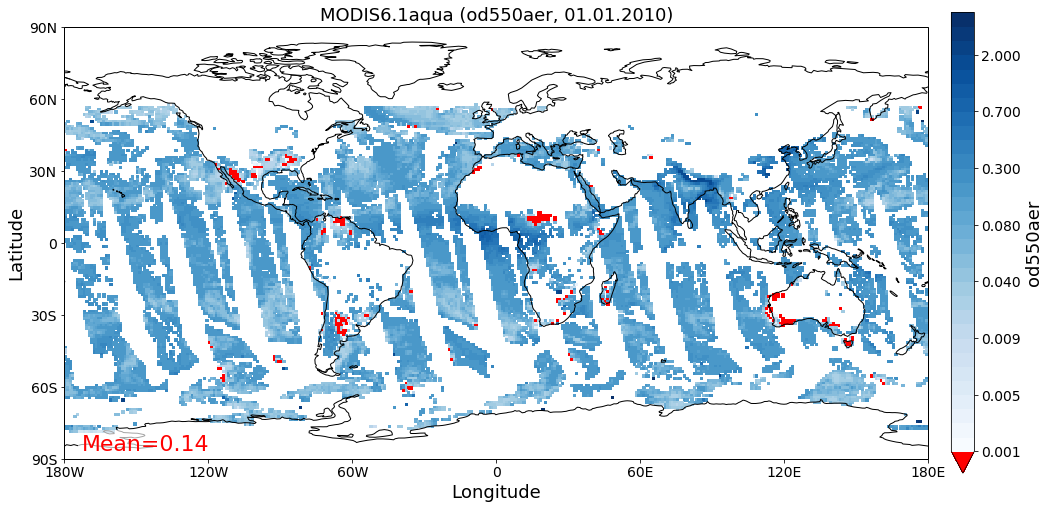

In [82]:
reader = pya.io.ReadGridded(data_id="MODIS6.1aqua")
sat = reader.read_var('od550aer', ts_type='monthly', start = 2010)
sat.quickplot_map();

In [ ]:
model = pya.io.ReadGridded(data_id="MODIS6.1aqua").read_var('od550aer', ts_type='monthly', start = 2010)

f1 = pya.filter.Filter('WORLD-noMOUNTAINS-LAND')
f2 = pya.filter.Filter('WORLD-noMOUNTAINS-OCN')



/home/hannas/Desktop/pyaerocom/pyaerocom/plot/mapping.py:321: RuntimeWarning: invalid value encountered in greater
  vmin = data[data>0].min()
/home/hannas/anaconda3/envs/pya/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


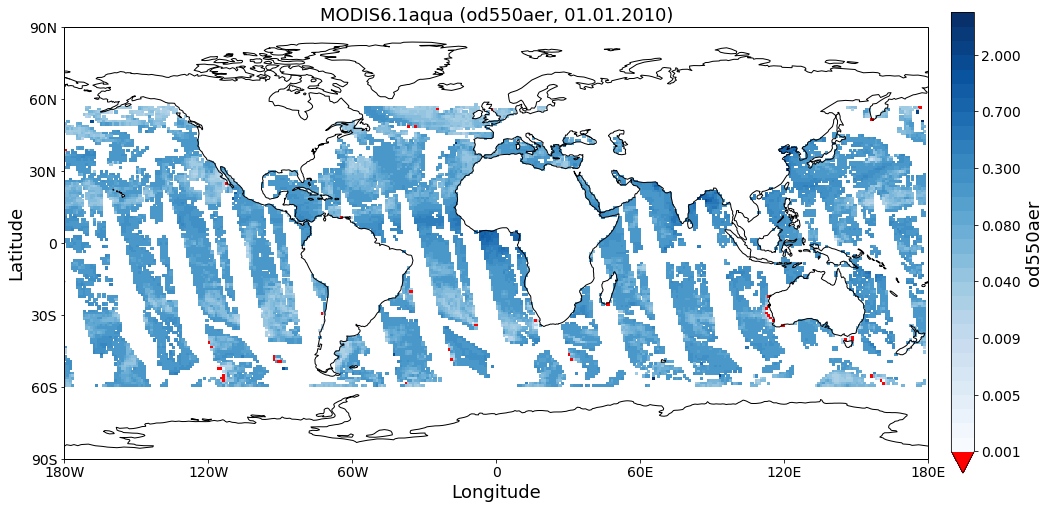

In [83]:
f = Filter(name = 'WORLD-noMOUNTAINS-OCN')
# data can either coloc, gridded, ungridded
data = f.apply(sat)
data.quickplot_map();

/home/hannas/Desktop/pyaerocom/pyaerocom/plot/mapping.py:321: RuntimeWarning: invalid value encountered in greater
  vmin = data[data>0].min()
/home/hannas/anaconda3/envs/pya/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


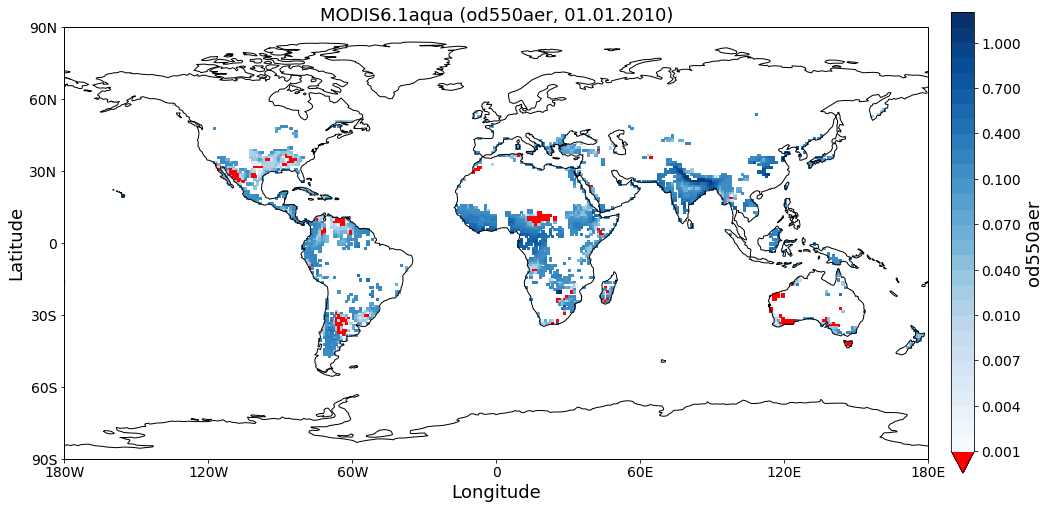

In [84]:
f = Filter(name = 'WORLD-noMOUNTAINS-LAND')
data = f.apply(sat)
data.quickplot_map();

In [108]:
#data.sel

In [112]:
np.nanmean(data.cube.data.data)

-6939.1149583639135

## You mentioned to compare Modis aqua 6.1 against one of the ctrl 2019, 2010 runs. 

- Variable: od550aer (AOD at 550nm)
- 2 models: TM5 and NorESM2, colocate vs.
- 2 satellites: MODIS 6.1 aqua (daily), AATSRv4.3 SU (daily)
- Colocate using only sea, only land and together and try to establish differences (e.g. bias (NMB)), particularly AATSR vs. MODIS in south pacific
- For colocation, be aware of input args `colocate_time, apply_time_resampling_constraints, min_num_obs=2?`
- for gridded vs gridded use `regrid_res_deg=5` to start with

In [85]:
VAR = 'od550aer'
year = 2010
freq = 'monthly'
MODELS = ['TM5-met2010_AP3-CTRL2019', 'NorESM2-met2010_AP3-CTRL']
SATELITES = [('AATSR_SU_v4.3', 'daily'), ('MODIS6.1aqua','daily')]

In [73]:
models = [pya.io.ReadGridded(data_id = model_id).read_var(VAR, ts_type='daily', start = year) for model_id in MODELS]
sats   = [pya.io.ReadGridded(data_id = sat_id).read_var(VAR, ts_type=freq, start = year) for sat_id, freq in SATELITES]

Deactivating file search by vertical code for AATSR_SU_v4.3, since filenames do not include information about vertical code (probably AeroCom 2 convention)
/home/hannas/anaconda3/envs/pya/lib/python3.7/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1932: UserWarning: Ignoring netCDF variable 'od550aer' invalid units 'none'
  warnings.warn(msg)
Overwriting unit unknown in cube od550aer with value "1"


In [80]:
sats[0]

pyaerocom.GriddedData
Grid data: <iris 'Cube' of atmosphere_optical_thickness_due_to_ambient_aerosol / (1) (time: 365; latitude: 180; longitude: 360)>

In [74]:
filters = ['WORLD-noMOUNTAINS-OCN', 'WORLD-noMOUNTAINS-LAND', 'WORLD-noMOUNTAINS']

/home/hannas/Desktop/pyaerocom/pyaerocom/griddeddata.py:1421: RuntimeWarning: invalid value encountered in less
  mask = np.logical_or(self.grid.data < low,
/home/hannas/Desktop/pyaerocom/pyaerocom/griddeddata.py:1422: RuntimeWarning: invalid value encountered in greater
  self.grid.data > high)
/home/hannas/anaconda3/envs/pya/lib/python3.7/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/hannas/Desktop/pyaerocom/pyaerocom/griddeddata.py:1421: RuntimeWarning: invalid value encountered in less
  mask = np.logical_or(self.grid.data < low,
/home/hannas/Desktop/pyaerocom/pyaerocom/griddeddata.py:1422: RuntimeWarning: invalid value encountered in greater
  self.grid.data > high)
/home/hannas/anaconda3/envs/pya/lib/python3.7/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/hannas/Desktop/pyaerocom/pyaerocom/griddeddata.py:1421: Runt

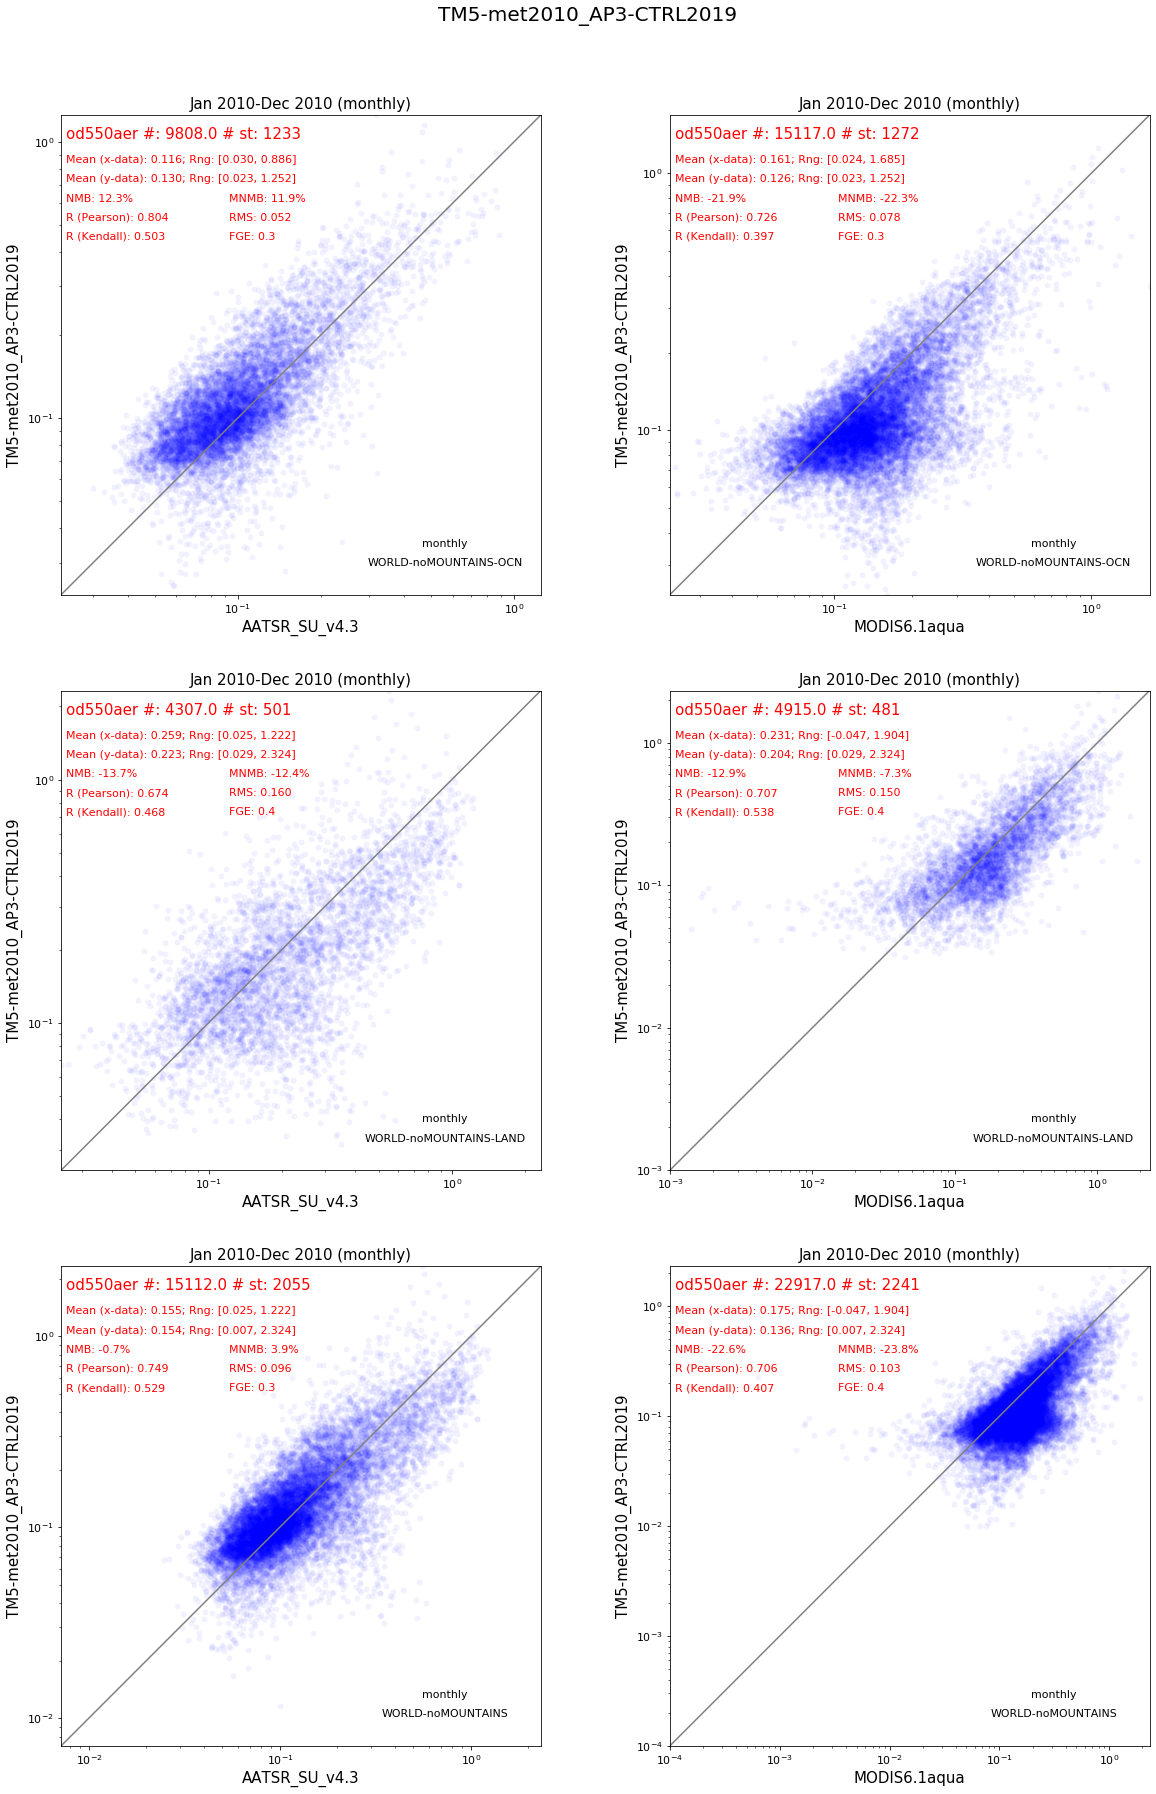

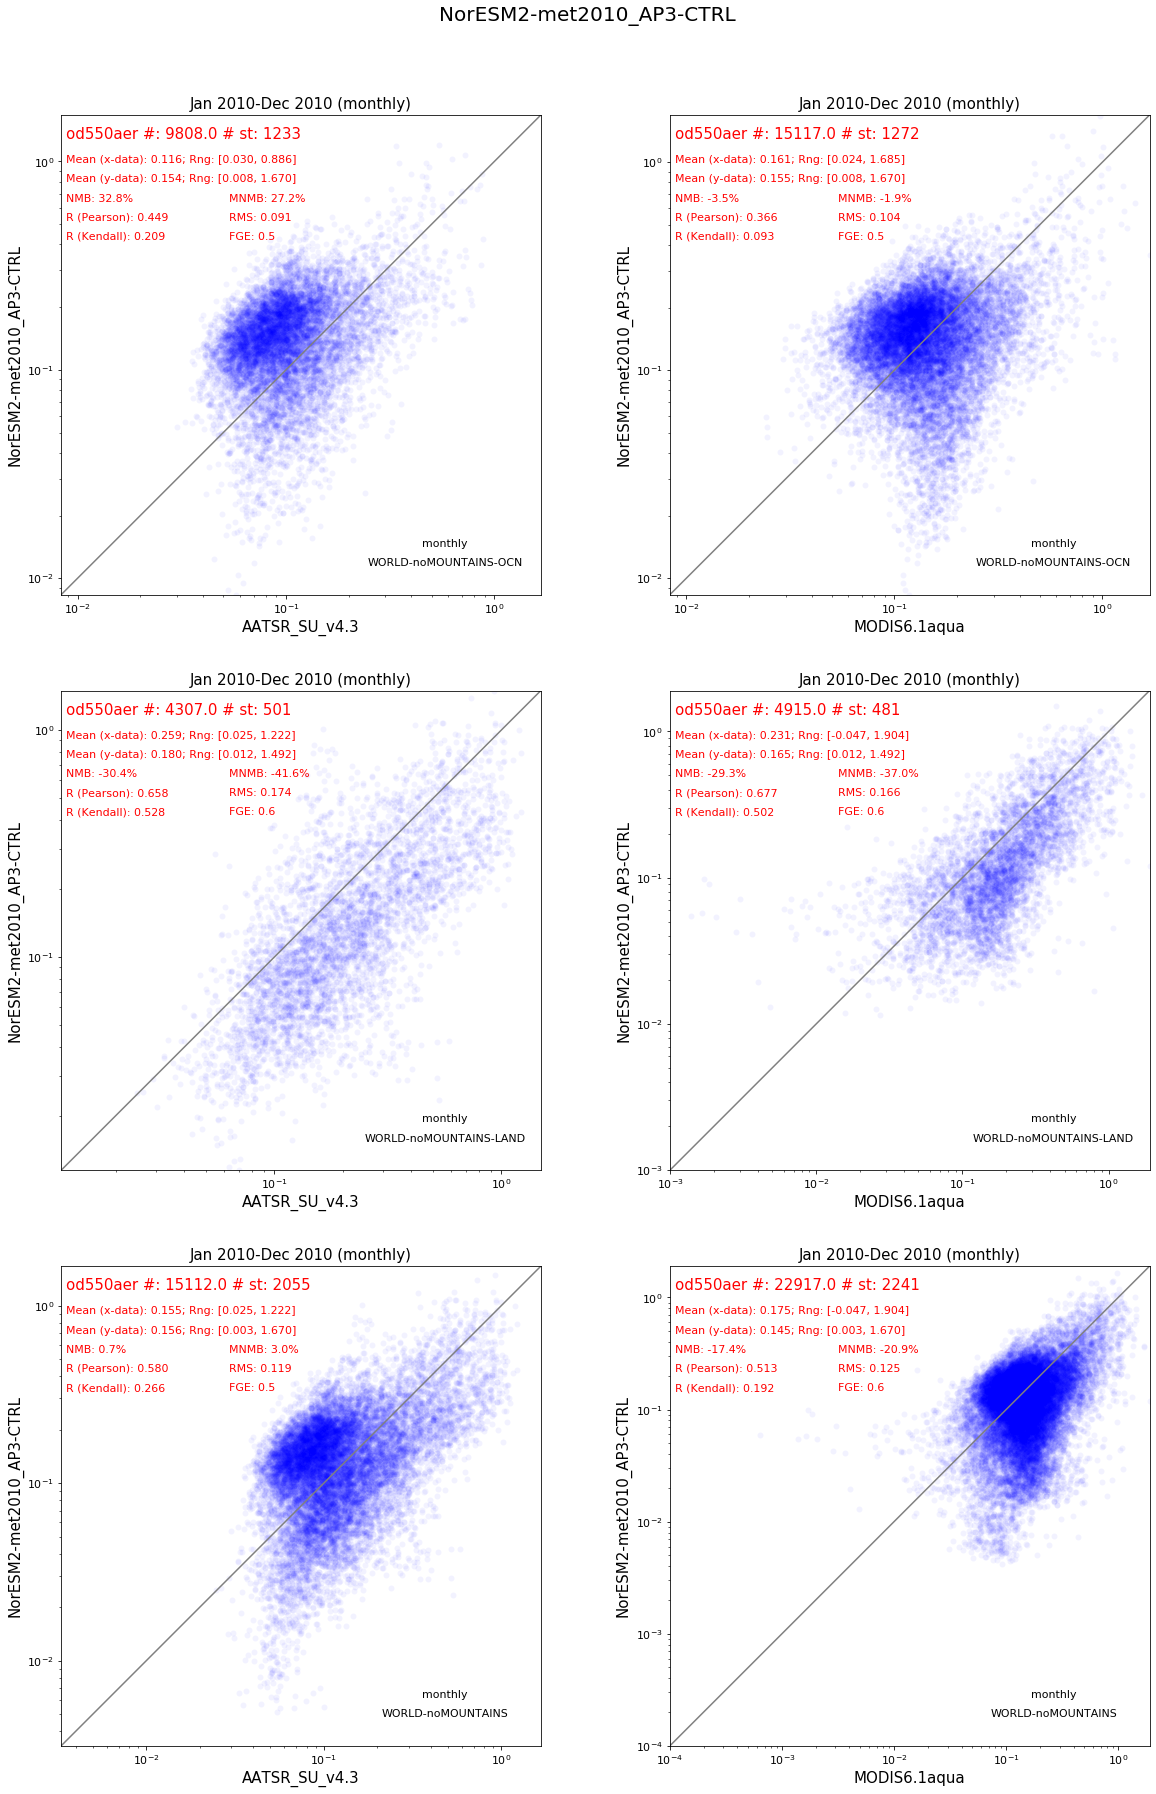

In [103]:
counter = 0
path = '/home/hannas/filter_images_test_jonas/'

for i, m in enumerate(models):
    counter = 0
    fig, axes = plt.subplots(3, 2, figsize = (20, 30)) # sharex = True, sharey = True,
    axes = axes.flatten()
    fig.suptitle('{}'.format(MODELS[i]), y=.93, fontsize = 20)

    for f in filters:
        for s in sats:
            data_coloc = pya.colocation.colocate_gridded_gridded(m, s, ts_type='monthly', 
                                                                 filter_name=f, regrid_res_deg = 5)          
            data_coloc.plot_scatter(marker='o', mec='none', color='b', alpha=0.05, ax = axes[counter]);
            counter += 1
            
    plt.savefig(path+'{}_subplot_not_sharing_axis_{}.png'.format(counter, MODELS[i]))

In [140]:
len(data_coloc.latitude )*len(data_coloc.longitude)

2592

# Why do you meed three attributes to apply time constraints

/home/hannas/anaconda3/envs/pya/lib/python3.7/site-packages/iris/coords.py:1138: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/home/hannas/anaconda3/envs/pya/lib/python3.7/site-packages/iris/coords.py:1138: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/home/hannas/anaconda3/envs/pya/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/home/hannas/anaconda3/envs/pya/lib/python3.7/site-packages/iris/coords.py:1138: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/home/hannas/anaconda3/envs/pya/lib/python3.7/site-packages/iris/coords.py:1138: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.f

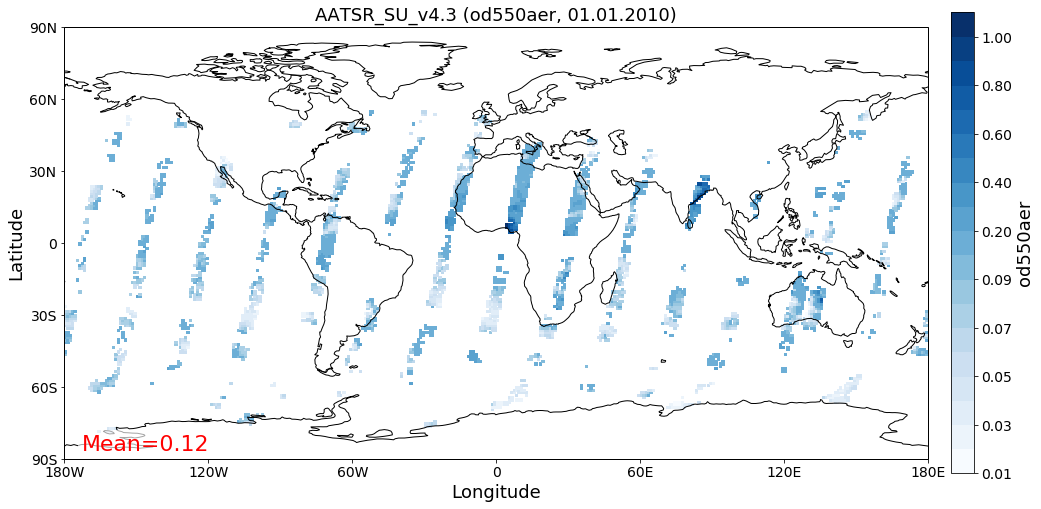

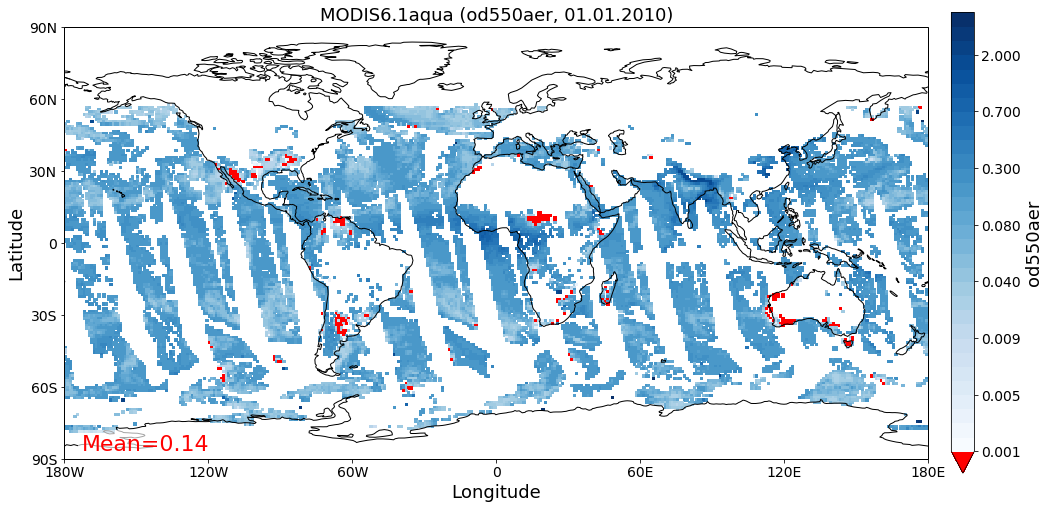

In [68]:
for s in sats:
    s.quickplot_map()

In [64]:
pya.browse_database('TM5*met2010_AP3-CTRL2019')


Pyaerocom ReadGridded
---------------------
Data ID: TM5-met2010_AP3-CTRL2019
Data directory: /lustre/storeA/project/aerocom/aerocom-users-database/AEROCOM-PHASE-III-2019/TM5-met2010_AP3-CTRL2019/renamed
Available experiments: ['AP3-CTRL2019']
Available years: [1850, 2010]
Available frequencies ['monthly' 'daily']
Available variables: ['abs350aer', 'abs440aer', 'abs440dryaer', 'abs550aer', 'abs550dryaer', 'abs550drylt1aer', 'abs870aer', 'abs870dryaer', 'airmass', 'asyaer', 'asydryaer', 'depbc', 'depdms', 'depdust', 'dephno3', 'depmsa', 'depn', 'depnh3', 'depnh4', 'depnhx', 'depno2', 'depno3', 'depnoy', 'depo3', 'depoa', 'deps', 'depso2', 'depso4', 'depss', 'dh', 'drybc', 'drydms', 'drydust', 'dryhno3', 'drynh3', 'dryno2', 'dryno3', 'drynoy', 'dryo3', 'dryoa', 'dryso2', 'dryso4', 'dryss', 'ec440dryaer', 'ec550aer', 'ec550dryaer', 'ec550drylt1aer', 'ec870dryaer', 'emibc', 'emico', 'emidms', 'emidust', 'emiisop', 'emin', 'eminh3', 'eminox', 'emioa', 'emis', 'emiso2', 'emiso4', 'emiss', '

In [18]:
pya.browse_database('*aeronet*sun*')

Reading failed for AeronetSunV2Lev1.5.daily. Error: NetworkNotImplemented('No reading class available yet for dataset AeronetSunV2Lev1.5.daily')
Reading failed for AeronetSun_2.0_NRT. Error: NetworkNotImplemented('No reading class available yet for dataset AeronetSun_2.0_NRT')

Dataset name: AeronetSunV2Lev2.daily
Data directory: /lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/AeronetRaw2.0/renamed
Supported variables: ['od1640aer', 'od1020aer', 'od870aer', 'od675aer', 'od667aer', 'od555aer', 'od551aer', 'od532aer', 'od531aer', 'od500aer', 'od440aer', 'od380aer', 'od340aer', 'ang4487aer', 'od550aer', 'ang4487aer_calc']
Last revision: 20180519

Dataset name: AeronetSunV2Lev2.AP
Data directory: /lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/AeronetSun2.0AllPoints/renamed
Supported variables: ['od1640aer', 'od1020aer', 'od870aer', 'od675aer', 'od667aer', 'od555aer', 'od551aer', 'od532aer', 'od531aer', 'od500aer', 'od440aer', 'od380aer', 'od340aer', 'ang4487aer', 'od550aer

# Test ungridded 

In [19]:
obs_id = 'AeronetSunV2Lev2.daily'

In [20]:
obs_id = 'AeronetSunV2Lev2.daily'
obs_reader = pya.io.ReadUngridded(obs_id, 'od500aer')
obs_data = obs_reader.read()#.filter_by_meta(altitude=[0, 1000])
print(obs_data)

/home/hannas/Desktop/pyaerocom/pyaerocom/ungriddeddata.py:126: RuntimeWarning: invalid value encountered in multiply
  self._data = np.empty([num_points, self._COLNO]) * np.nan



Pyaerocom UngriddedData
-----------------------
Contains networks: ['AeronetSunV2Lev2.daily']
Contains variables: ['od500aer']
Contains instruments: ['sun_photometer']
Total no. of meta-blocks: 1028


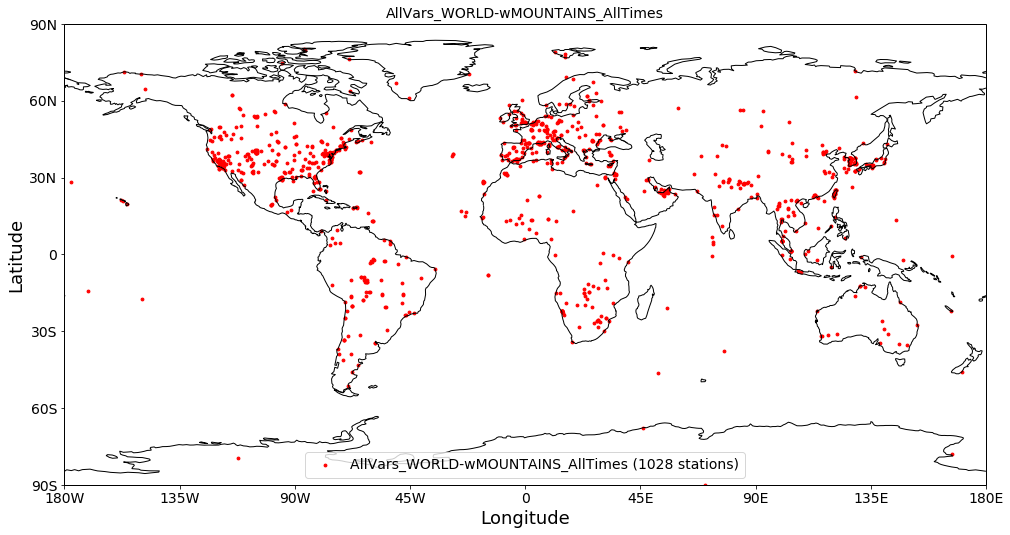

In [21]:
obs_data.plot_station_coordinates()

In [127]:
f = Filter(name = 'EUROPE-noMOUNTAINS')
data = f.apply(obs_data) 

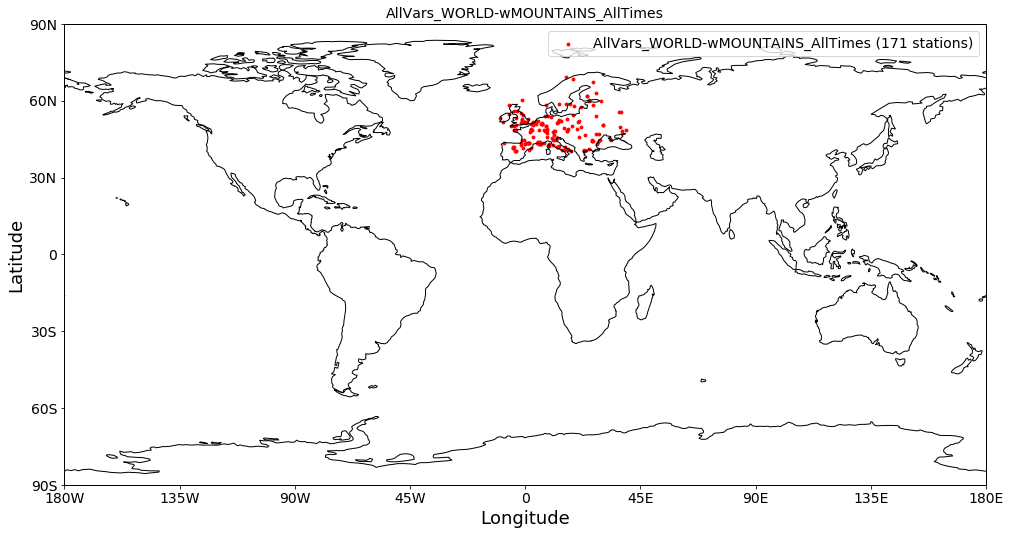

In [128]:
data.plot_station_coordinates()

In [136]:
gg.keys()

dict_keys(['stats', 'station_name', 'latitude', 'failed', 'longitude'])

In [141]:
len(gg['station_name'])*len(gg['failed'])

1610

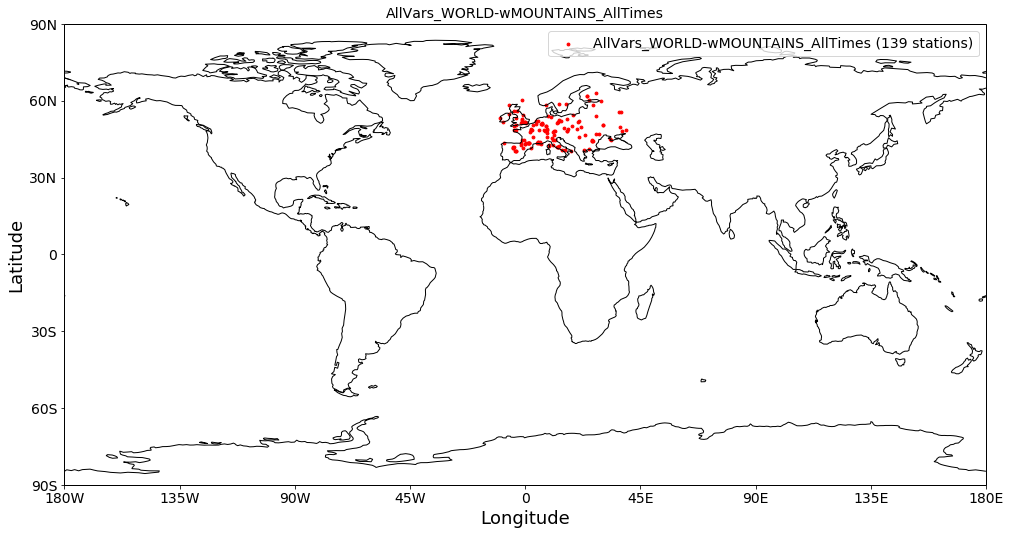

In [24]:
f = Filter(name = 'EUROPE-noMOUNTAINS-LAND')
ungridded_data = pya.io.ReadUngridded().read('AeronetSunV3Lev2.daily' , 'od550aer')
ungridded_data = f.apply(ungridded_data)
ungridded_data.plot_station_coordinates()

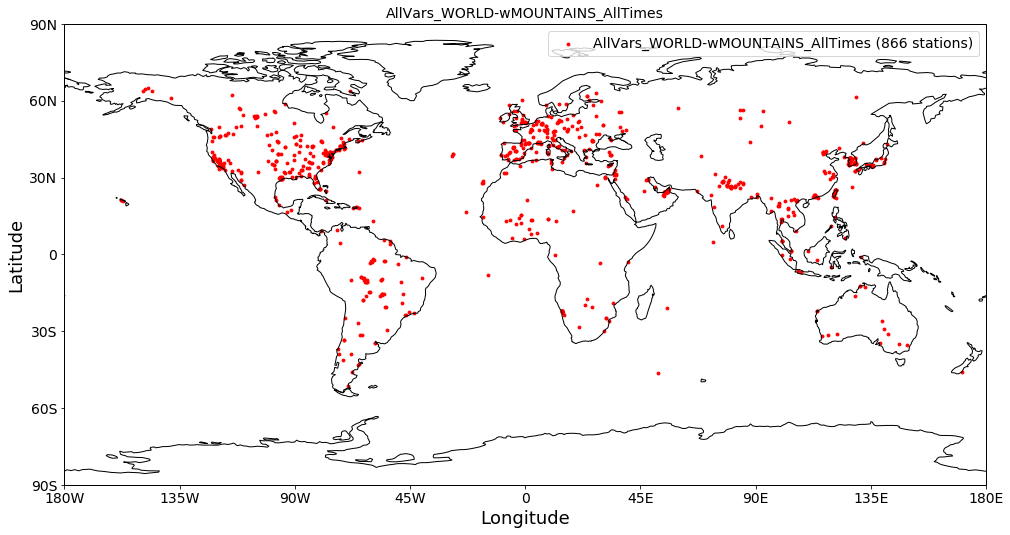

In [25]:
f = Filter(name = 'WORLD-noMOUNTAINS-LAND')
ungridded_data = pya.io.ReadUngridded().read('AeronetSunV3Lev2.daily' , 'od550aer')
ungridded_data = f.apply(ungridded_data)
ungridded_data.plot_station_coordinates()

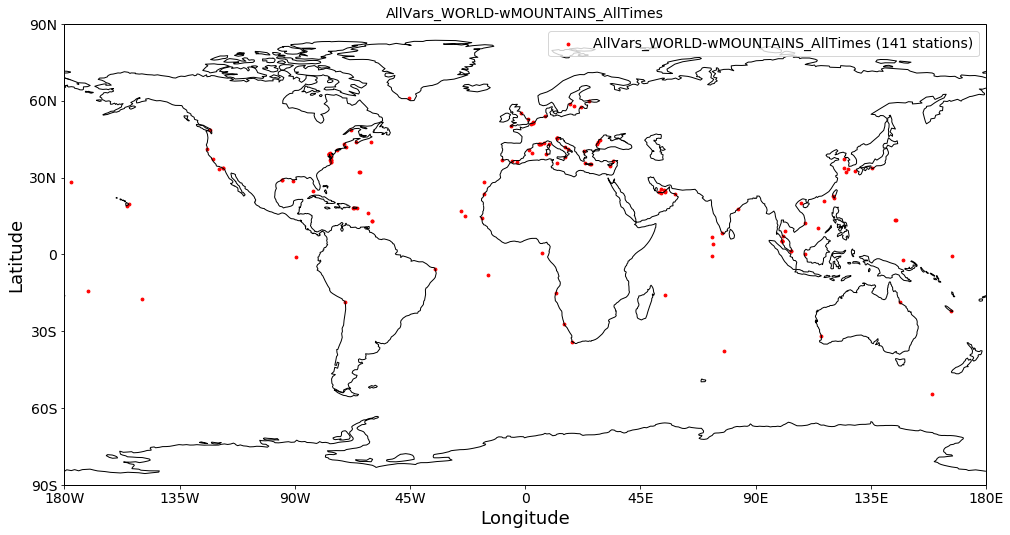

In [26]:
f = Filter(name = 'WORLD-noMOUNTAINS-OCN')
ungridded_data = pya.io.ReadUngridded().read('AeronetSunV3Lev2.daily' , 'od550aer')

ungridded_data = f.apply(ungridded_data)
ungridded_data.plot_station_coordinates()

## Colocate the two above? 

In [27]:
model_id = 'EC-Earth3-AerChem-met2010_AP3-CTRL2019'

In [28]:
reader = pya.io.ReadGridded(data_id=model_id)
model = reader.read_var('od550aer', ts_type='daily', start = 2010)

/home/hannas/anaconda3/envs/pya/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


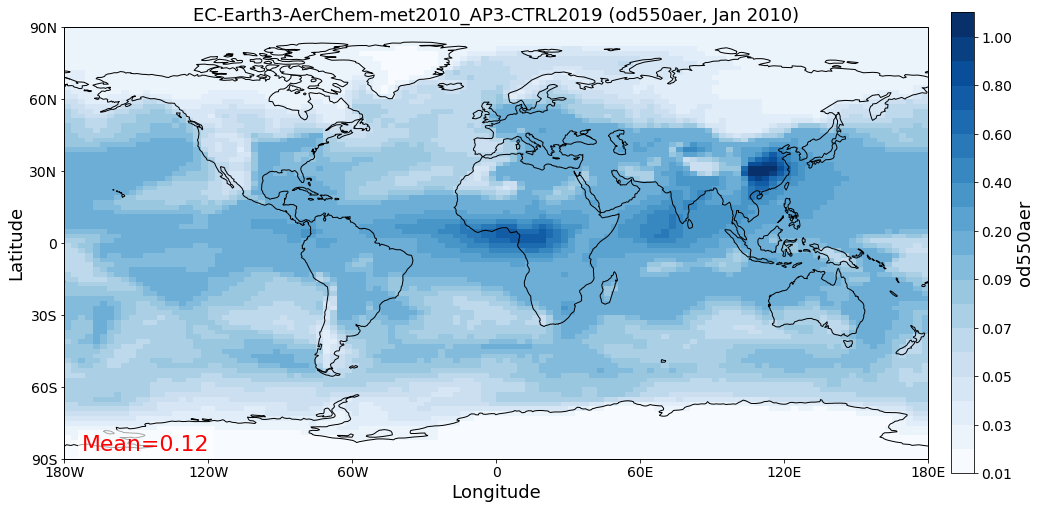

In [29]:
model.quickplot_map();

In [30]:
# fix the load 

In [31]:
data_coloc = pya.colocation.colocate_gridded_gridded(model, sat, ts_type='monthly', filter_name='WORLD-noMOUNTAINS-OCN') 
# Filter_name='WORLD-noMOUNTAINS')

Applying regional cropping in GriddedData using Filter class. Note that this does not yet include potential cropping in the vertical dimension. Coming soon...
Applying regional cropping in GriddedData using Filter class. Note that this does not yet include potential cropping in the vertical dimension. Coming soon...
/home/hannas/anaconda3/envs/pya/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
Setting od550aer outlier lower lim: -1.00
Setting od550aer outlier upper lim: 10.00
/home/hannas/Desktop/pyaerocom/pyaerocom/griddeddata.py:1421: RuntimeWarning: invalid value encountered in less
  mask = np.logical_or(self.grid.data < low,
/home/hannas/Desktop/pyaerocom/pyaerocom/griddeddata.py:1422: RuntimeWarning: invalid value encountered in greater
  self.grid.data > high)


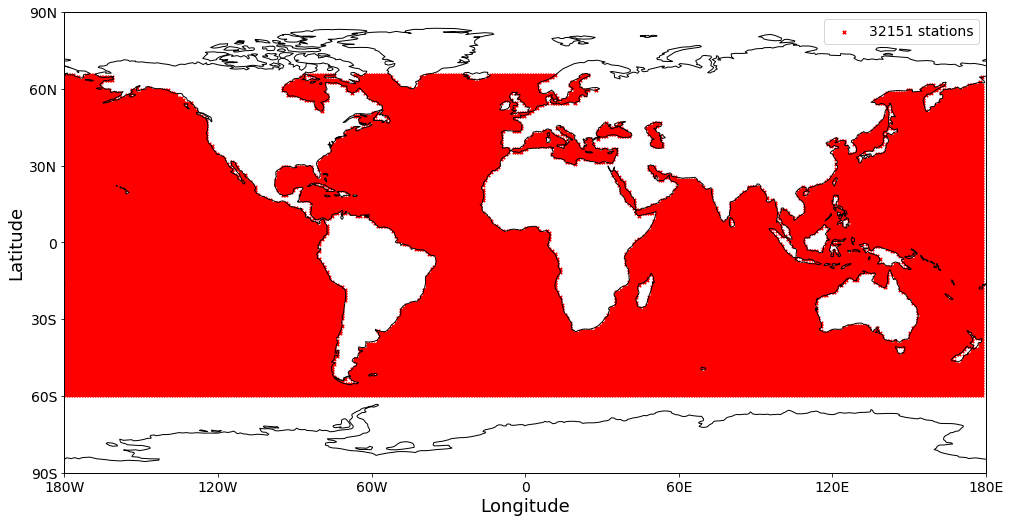

In [32]:
data_coloc.plot_coordinates()

# CTRL run? Compare to AERONETSUN --> Ungriddeddata object.
## Duplicate od550aer -

Deactivating file search by vertical code for ECMWF_CAMS_REAN, since filenames do not include information about vertical code (probably AeroCom 2 convention)
Applying regional cropping in GriddedData using Filter class. Note that this does not yet include potential cropping in the vertical dimension. Coming soon...
Setting od550aer outlier lower lim: -1.00
Setting od550aer outlier upper lim: 10.00
/home/hannas/anaconda3/envs/pya/lib/python3.7/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


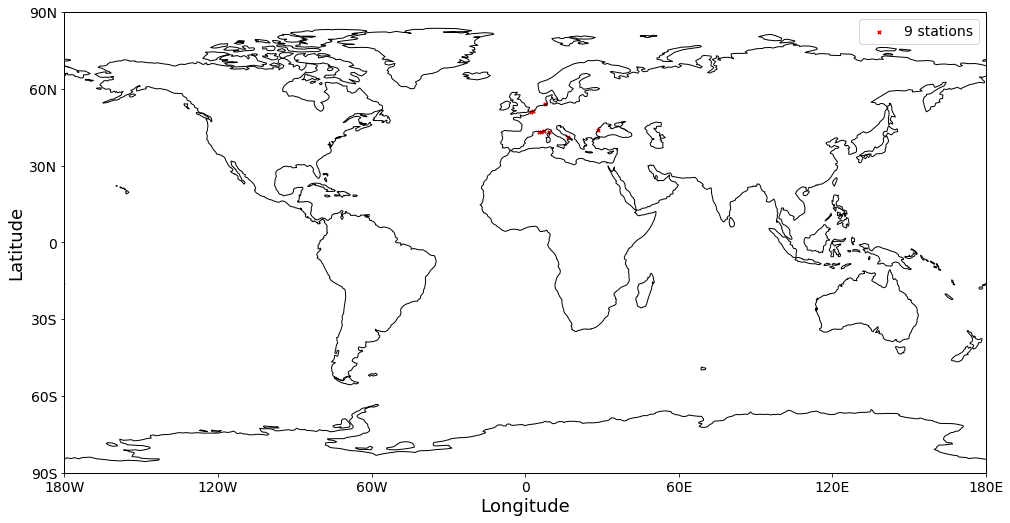

In [33]:
YEAR = 2010
VAR = "od550aer"
TS_TYPE = "daily"
MODEL_ID = "ECMWF_CAMS_REAN"
OBS_ID = 'AeronetSunV3Lev2.daily'

model_reader = pya.io.ReadGridded(MODEL_ID)
model_data = model_reader.read_var(VAR, start=YEAR)

obs_reader = pya.io.ReadUngridded(OBS_ID, [VAR])
obs_data = obs_reader.read()#.filter_by_meta(altitude=[0, 1000])

f = Filter(name = 'EUROPE-noMOUNTAINS-OCN')
#model_data = f.apply(model_data)
#obs_data = f.apply(obs_data)
data_coloc_alt = pya.colocation.colocate_gridded_ungridded(model_data, obs_data, ts_type='monthly',
                                                           filter_name='EUROPE-noMOUNTAINS-OCN',
                                                           colocate_time=True)

data_coloc_alt.plot_coordinates()#scatter(marker='o', mec='none', color='b', alpha=0.05);


Applying regional cropping in GriddedData using Filter class. Note that this does not yet include potential cropping in the vertical dimension. Coming soon...
Setting od550aer outlier lower lim: -1.00
Setting od550aer outlier upper lim: 10.00
/home/hannas/anaconda3/envs/pya/lib/python3.7/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


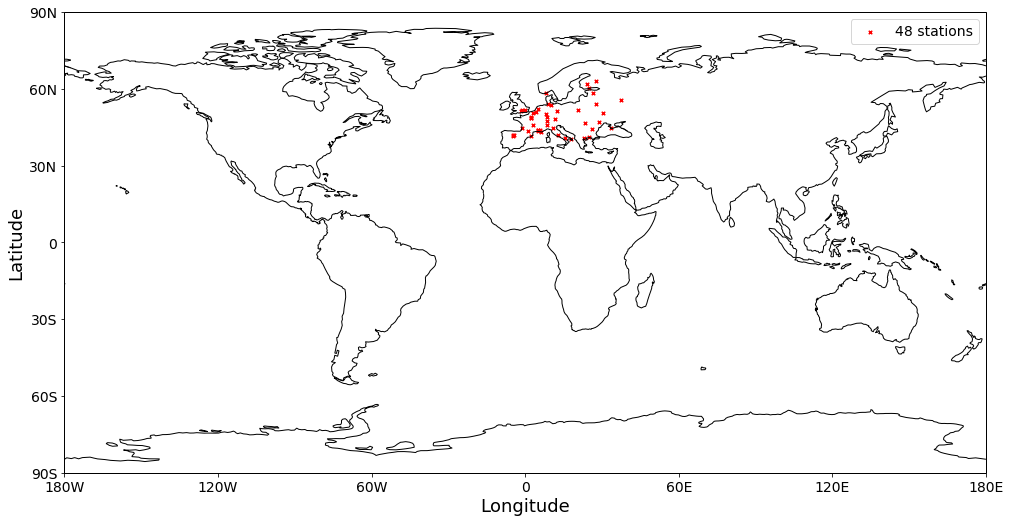

In [34]:
data_coloc_alt = pya.colocation.colocate_gridded_ungridded(model_data, obs_data, ts_type='monthly',
                                                           filter_name='EUROPE-noMOUNTAINS-LAND',
                                                           colocate_time=True)

data_coloc_alt.plot_coordinates()#scatter(marker='o', mec='none', color='b', alpha=0.05);


In [155]:
data_coloc.data.sum().values - 7535.67611753 < 0.001

True

In [35]:
pya.browse_database('*aeronet*')

Reading failed for AeronetSunV2Lev1.5.daily. Error: NetworkNotImplemented('No reading class available yet for dataset AeronetSunV2Lev1.5.daily')
Reading failed for AeronetSun_2.0_NRT. Error: NetworkNotImplemented('No reading class available yet for dataset AeronetSun_2.0_NRT')

Dataset name: AeronetSunV2Lev2.daily
Data directory: /lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/AeronetRaw2.0/renamed
Supported variables: ['od1640aer', 'od1020aer', 'od870aer', 'od675aer', 'od667aer', 'od555aer', 'od551aer', 'od532aer', 'od531aer', 'od500aer', 'od440aer', 'od380aer', 'od340aer', 'ang4487aer', 'od550aer', 'ang4487aer_calc']
Last revision: 20180519

Dataset name: AeronetSunV2Lev2.AP
Data directory: /lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/AeronetSun2.0AllPoints/renamed
Supported variables: ['od1640aer', 'od1020aer', 'od870aer', 'od675aer', 'od667aer', 'od555aer', 'od551aer', 'od532aer', 'od531aer', 'od500aer', 'od440aer', 'od380aer', 'od340aer', 'ang4487aer', 'od550aer

FileNotFoundError('None of the available files in /lustre/storeA/project/aerocom/aerocom1/AERONET_TESTBED-SK matches a registered pyaerocom file convention')
FileNotFoundError('None of the available files in /lustre/storeA/project/aerocom/aerocom1/AERONET_TESTBED-SK matches a registered pyaerocom file convention')


Reading failed for AERONET_TESTBED-SK. Error: AttributeError("'NoneType' object has no attribute 'experiment'")


In [36]:
#data_coloc = pya.colocation.colocate_gridded_ungridded(model, sat, ts_type='monthly') # Filter_name='WORLD-noMOUNTAINS')

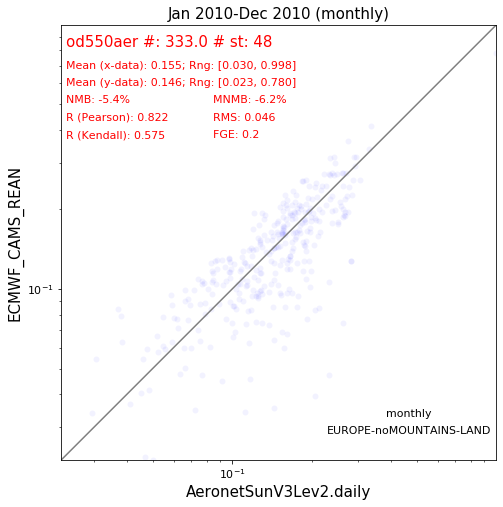

In [37]:
# four of these plots.
ax = data_coloc_alt.plot_scatter(marker='o', mec='none', color='b', alpha=0.05);

In [38]:
sat = pya.io.ReadGridded('MODIS6.aqua').read_var('od550aer', start=2010)

Deactivating file search by vertical code for MODIS6.aqua, since filenames do not include information about vertical code (probably AeroCom 2 convention)
/home/hannas/anaconda3/envs/pya/lib/python3.7/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1932: UserWarning: Ignoring netCDF variable 'od550aer' invalid units 'none'
  warnings.warn(msg)
Overwriting unit unknown in cube od550aer with value "1"


In [39]:
coldata = pya.colocation.colocate_gridded_ungridded(sat, obs_data, ts_type='monthly',
                                                    filter_name='OCN')

/home/hannas/Desktop/pyaerocom/pyaerocom/ungriddeddata.py:126: RuntimeWarning: invalid value encountered in multiply
  self._data = np.empty([num_points, self._COLNO]) * np.nan
Setting od550aer outlier lower lim: -1.00
Setting od550aer outlier upper lim: 10.00
Extracting timeseries data from large array (shape: (365, 180, 360)). This may take a while...
Time series extraction successful. Elapsed time: 0 s
/home/hannas/anaconda3/envs/pya/lib/python3.7/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [40]:
coldata

<xarray.DataArray 'od550aer' (data_source: 2, time: 12, station_name: 37)>
array([[[0.036496, 0.048349, ...,      nan, 0.132123],
        [0.051313,      nan, ...,      nan, 0.059647],
        ...,
        [     nan, 0.040762, ..., 0.068005, 0.055903],
        [     nan, 0.054856, ...,      nan, 0.055317]],

       [[0.129786, 0.069947, ..., 0.093556, 0.093286],
        [0.132929, 0.081167, ..., 0.111333, 0.165722],
        ...,
        [0.121615, 0.074533, ..., 0.0855  , 0.062053],
        [0.147182, 0.062929, ..., 0.0685  , 0.057625]]])
Coordinates:
  * time          (time) datetime64[ns] 2010-01-15 2010-02-15 ... 2010-12-15
  * data_source   (data_source) object 'AeronetSunV3Lev2.daily' 'MODIS6.aqua'
    var_name      (data_source) <U8 'od550aer' 'od550aer'
    var_units     (data_source) <U1 '1' '1'
    ts_type_src   (data_source) <U5 'daily' 'daily'
  * station_name  (station_name) object 'Amsterdam_Island' ... 'Villefranche'
    latitude      (station_name) float64 -37.8 42.99 13

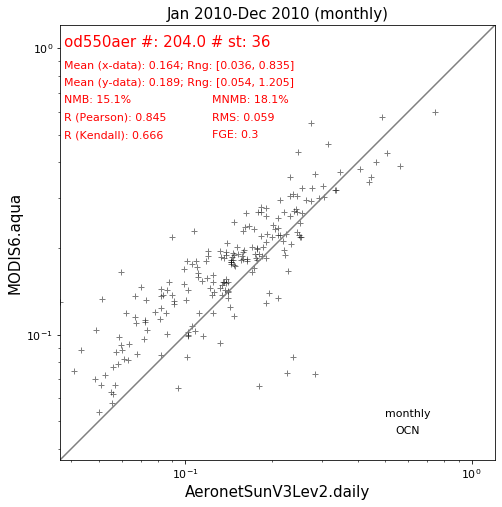

In [41]:
coldata.plot_scatter()

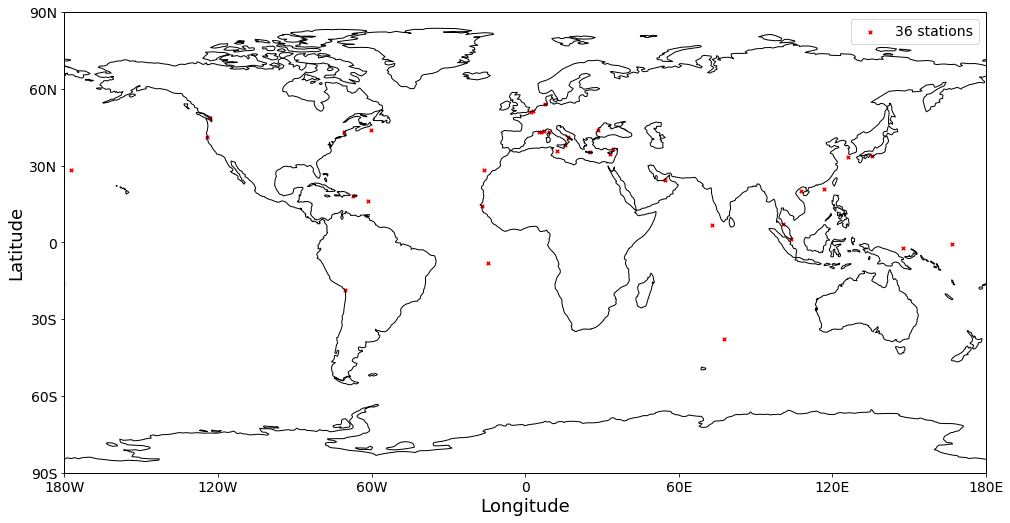

In [42]:
coldata.plot_coordinates()

In [125]:
model = pya.io.ReadGridded(data_id="MODIS6.1aqua").read_var('od550aer', ts_type='monthly', start = 2010)
f1 = pya.filter.Filter('WORLD-noMOUNTAINS-LAND')
f2 = pya.filter.Filter('WORLD-noMOUNTAINS-OCN')

m_land = f1.apply(model)
m_ocn  = f2.apply(model)

a = np.abs(np.nansum(model.cube.data.data))
b = np.abs(np.nansum(m_ocn.cube.data.data))
c = np.abs(np.nansum(m_land.cube.data.data))

print(" a - b - c= {}  ".format(a- b-c))

/home/hannas/anaconda3/envs/pya/lib/python3.7/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1932: UserWarning: Ignoring netCDF variable 'od550aer' invalid units 'none'
  warnings.warn(msg)


 a - b - c= 67136851587.97949  


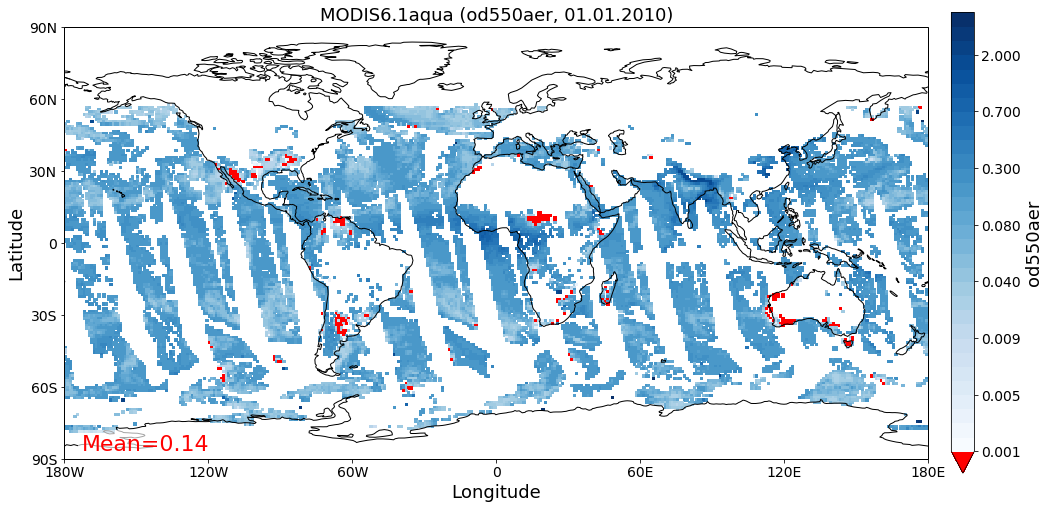

In [120]:
model.quickplot_map();

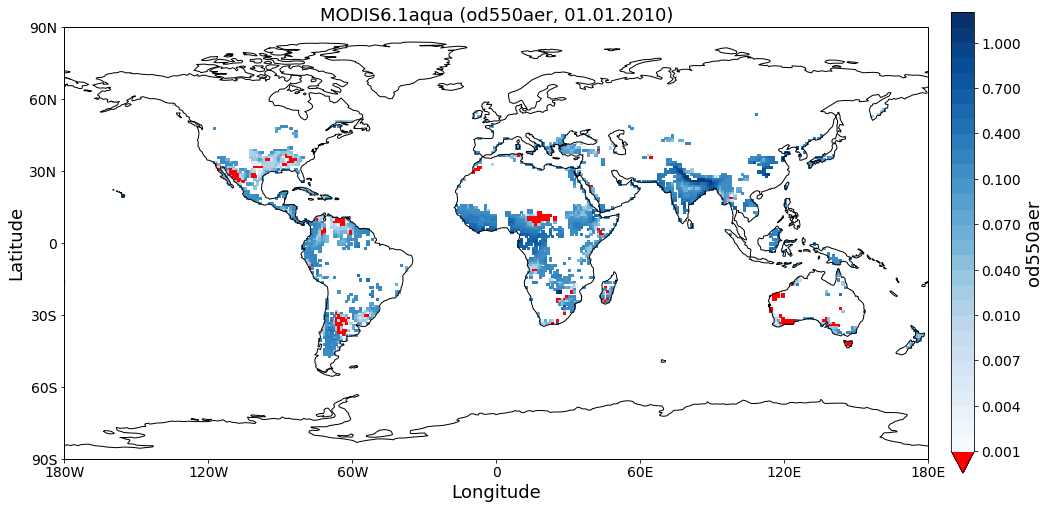

In [122]:
m_land.quickplot_map();

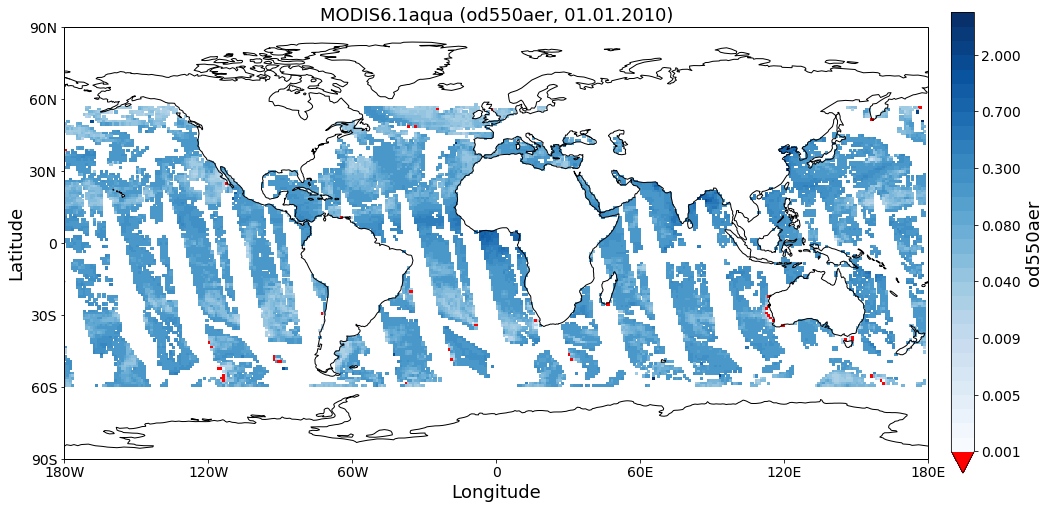

In [124]:
m_ocn.quickplot_map();

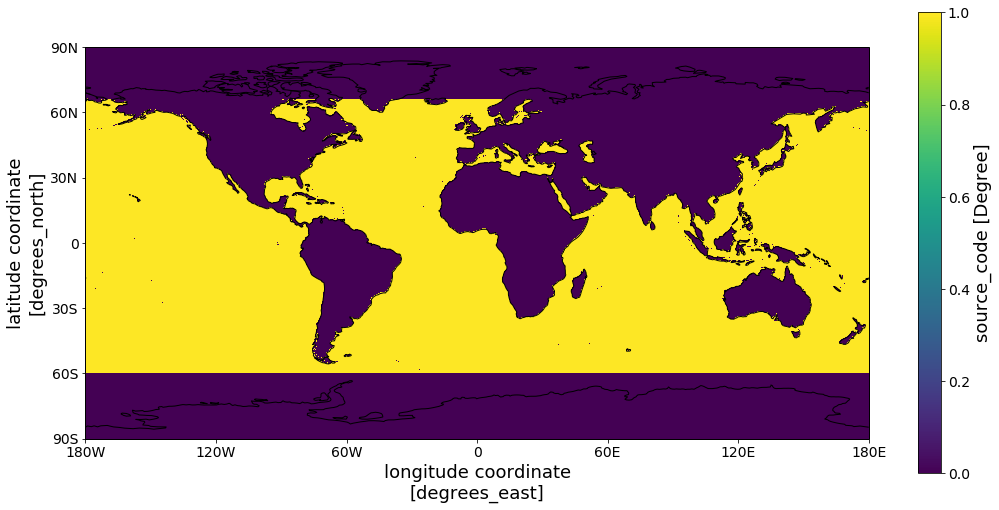

In [117]:
pya.region.Region('OCN').plot()

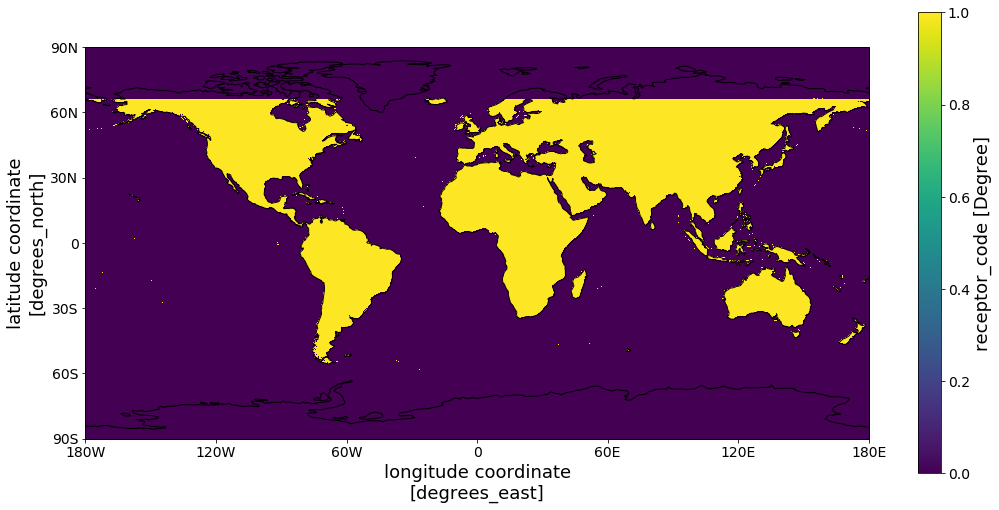

In [118]:
pya.region.Region('LAND').plot()